# LSST Simulation generation
This notebook is a wrapper for StarFast, which generates simulated images with realistic stellar distributions and spectra, psf and filters, and detailed atmospheric differential chromatic refraction (DCR)

In [1]:
import numpy as np
from python.notebook_utils import look
from python.simulation_utils import simulation_wrapper

Set up the general parameters to use for all of the simulations 

In [2]:
seed = 6
n_star = 10000
n_quasar = 1000
attenuation = 20.
wavelength_step = 10
output_directory = "/Users/sullivan/LSST/simulations/test%1i_quasars/" % seed
sim = simulation_wrapper(seed=seed, n_star=n_star, n_quasar=n_quasar, output_directory=output_directory,
                         attenuation=attenuation, wavelength_step=wavelength_step,
                         write_catalog=True, write_fits=False, do_simulate=False)

Number and flux contribution of stars of each type:
 [M 7594| 1.54%] [K 1247| 2.14%] [G 788| 3.47%] [F 286| 4.12%] [A 73| 13.12%] [B 12| 75.61%] [O 0| 0.00%]
Writing 1138 stars brighter than 16.0 mag to reference catalog in 5 bands
Min/max magnitude:  6.0289037879096306 21.67628046607317


In [19]:
from numpy.fft import rfft2, irfft2, fftshift
def simple_convolve(sim, f, psf=None, verbose=True, bright=False):
    CoordsXY = sim.coord
    if bright:
        CoordsXY.set_oversample(2)
    else:
        CoordsXY.set_oversample(1)
    convol = np.zeros((CoordsXY.ysize(), CoordsXY.xsize()//2 + 1), dtype='complex64')
    if psf is None:
        psf = sim.psf
    if sim.psf is None:
        sim.load_psf(psf)
    psf_norm = 1.0/sim.psf.flux

    if bright:
        source_model_use = sim.bright_model[f]
    else:
        source_model_use = sim.source_model[f]

    psf_image = psf.drawImage(scale=CoordsXY.scale(), method='fft',
                              nx=CoordsXY.xsize(), ny=CoordsXY.ysize(), use_true_center=False)

    convol_single = source_model_use * rfft2(psf_image.array)
    convol += convol_single
    
    return_image = np.real(fftshift(irfft2(convol)))*(CoordsXY.oversample**2.0)*psf_norm

    return_image = return_image[CoordsXY.ymin():CoordsXY.ymax():CoordsXY.oversample,
                                CoordsXY.xmin():CoordsXY.xmax():CoordsXY.oversample]
    if bright:
        CoordsXY.set_oversample(1)
    return(return_image)

In [20]:
images = [simple_convolve(sim, f) for f in range(sim.n_step)]

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

<IPython.core.display.Javascript object>


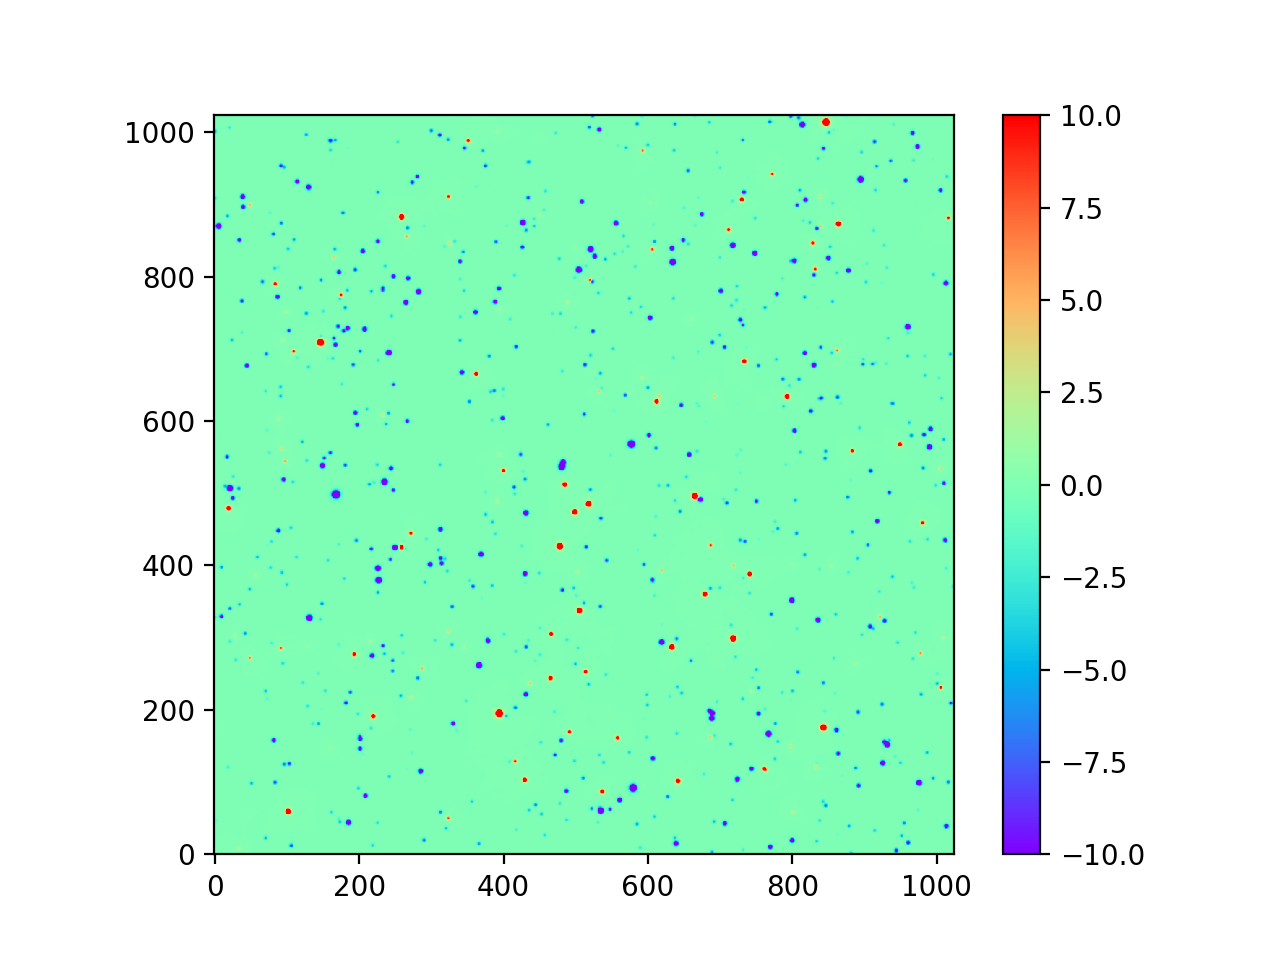

In [39]:
look(images[3]-images[10], window=1, range=[-10,10])

# g-band simulation

In [4]:
band_name = 'g'

In [ ]:
sim = simulation_wrapper(sim, band_name=band_name, write_catalog=True, write_fits=False, output_directory=output_directory)

In [6]:
sim = simulation_wrapper(sim, band_name=band_name, write_catalog=False, write_fits=True, output_directory=output_directory)

FFT timing for 15 DCR planes: [1.765s | 0.118s per plane]
FFT timing for 15 DCR planes: [7.150s | 0.477s per plane]
FFT timing for 15 DCR planes: [2.056s | 0.137s per plane]
FFT timing for 15 DCR planes: [7.962s | 0.531s per plane]
FFT timing for 15 DCR planes: [2.000s | 0.133s per plane]
FFT timing for 15 DCR planes: [7.776s | 0.518s per plane]
FFT timing for 15 DCR planes: [1.712s | 0.114s per plane]
FFT timing for 15 DCR planes: [7.453s | 0.497s per plane]
FFT timing for 15 DCR planes: [3.158s | 0.211s per plane]
FFT timing for 15 DCR planes: [8.562s | 0.571s per plane]
FFT timing for 15 DCR planes: [1.829s | 0.122s per plane]
FFT timing for 15 DCR planes: [7.310s | 0.487s per plane]
FFT timing for 15 DCR planes: [1.772s | 0.118s per plane]
FFT timing for 15 DCR planes: [8.203s | 0.547s per plane]
FFT timing for 15 DCR planes: [2.880s | 0.192s per plane]
FFT timing for 15 DCR planes: [10.052s | 0.670s per plane]
FFT timing for 15 DCR planes: [3.069s | 0.205s per plane]
FFT timing fo

# u-band simulation

In [ ]:
band_name = 'u'

In [ ]:
sim = simulation_wrapper(sim, band_name=band_name, write_catalog=True, write_fits=False)

In [ ]:
sim = simulation_wrapper(sim, band_name=band_name, write_catalog=False, write_fits=True)